In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('..')

In [ ]:
from talus_data_analysis.s3 import _read_object_from_s3
from talus_data_analysis.elib import Elib_S3
import pandas as pd
from dotenv import load_dotenv
import gzip
import zlib
import base64
import binascii
import struct
import numpy as np
import pymzml
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [ ]:
load_dotenv()

True

In [ ]:
ENCYCLOPEDIA_BUCKET="talus-data-pipeline-encyclopedia-bucket"
MZML_BUCKET="talus-data-pipeline-mzml-bucket"

In [ ]:
elib_file = "wide/210308_MLLtx/RESULTS-quant.elib"

In [ ]:
elib_conn = Elib_S3(bucket=ENCYCLOPEDIA_BUCKET, key=elib_file)

In [ ]:
df_entries = elib_conn.execute_sql(sql="SELECT * FROM entries", use_pandas=True)

In [ ]:
df_entries.head()

,PrecursorMz,PrecursorCharge,PeptideModSeq,PeptideSeq,Copies,RTInSeconds,Score,MassEncodedLength,MassArray,IntensityEncodedLength,IntensityArray,CorrelationEncodedLength,CorrelationArray,RTInSecondsStart,RTInSecondsStop,MedianChromatogramEncodedLength,MedianChromatogramArray,SourceFile
0,548.244322,2,YRQDDDQR,YRQDDDQR,1,1030.535522,0.004577,72,b'x\x9c\x01H\x00\xb7\xff@r\xf2\xd7)\xda\xe8\\@...,36,b'x\x9c\xf3n\xf3\xbf\xec)\xbdb\xb6\xe7\xa9\xbb...,36,b'x\x9c\xb3\xaf\xdf\xf4\xd6\xbe\xfe\xa5\xbd}}\...,1018.484802,1042.590576,100,b'x\x9cc` \x0cls\x7f\x89\xd9\x89\xeezb\xe7_\xa...,210308_talus_03.mzML
1,888.936156,2,ASSTSPVEISEWLDQK,ASSTSPVEISEWLDQK,1,4298.609375,0.002213,80,b'x\x9c\x01P\x00\xaf\xff@n\xc3xd\xb9\x8a\x80@q...,40,b'x\x9c\xf3\xd0?\xbe\xcaK\xaf~\xba\x97\xa6y\x8...,40,b'x\x9c\xb3\xaf\xfe\xb3\xcc\xbe\xb2\xdb\xd2\xb...,4286.614746,4325.660645,100,"b'x\x9cc`\xc0\x0e,\x0eG\x17ZkF\xfc\x00\xb1mv\x...",210308_talus_03.mzML
2,624.814580,2,YDPQKEAELR,YDPQKEAELR,1,2162.066895,1.000000,8,b'x\x9cs\xe8\x0bq84\xed\xd7R\x00\x10\x85\x04Z',4,b'x\x9c\xf3\xe4\xd8j\x05\x00\x02\xe4\x01A',4,b'x\x9c\xb3o``\x00\x00\x02\x80\x00\xc0',2142.997314,2173.018799,100,b'x\x9cc`\xc0\rl\xa7F=\xb5\xbd\xf3X\xdf\xce\xe...,210308_talus_03.mzML
3,613.342978,2,LVGATATSSPPPK,LVGATATSSPPPK,1,2057.677246,1.000000,0,b'x\x9c\x03\x00\x00\x00\x00\x01',0,b'x\x9c\x03\x00\x00\x00\x00\x01',0,b'x\x9c\x03\x00\x00\x00\x00\x01',2022.438599,2094.705566,0,b'x\x9c\x03\x00\x00\x00\x00\x01',210308_talus_03.mzML
4,739.730677,3,HGPGQAPDVKPVQNGSQLFIK,HGPGQAPDVKPVQNGSQLFIK,1,3100.340088,0.035566,48,b'x\x9cs(pV\x8b7?X\xe5PYb7\xa3\x9e\xeb\x89C\xa...,24,"b""x\x9c\xf3l\x08\xb8\xe6\xbe\xfe\xb9\x98'\xe7\...",24,b'x\x9c\xb3\xaf\xc9\n\xb7\xaf\xf9s\xd7\xbe\xae...,3088.337646,3112.370361,100,b'x\x9cc` \x0cl\xe7\xc4\xce\xb3\x13c}d\xe7\xb7...,210308_talus_03.mzML


In [ ]:
INTENSITY = 46536104.0

In [ ]:
sum(dintensity)

array([16895238.25])

In [ ]:
mass = df["MassArray"].values[0]
mass

b'x\x9c\x01(\x00\xd7\xff@o\x05"\xad\x8f`\xe0@~\xe4Z\xc2\xd6$\xa8@\x83\x92\xe5s\xbb\xcb>@\x85[\x11i\r\x1b\x93@\x88\xe3\xbd\x92\xcc1\xbe~\x87\x13.'

In [ ]:
intensity = df["IntensityArray"].values[0]
intensity

b'x\x9c\xf3\xd2jn\xf2Z\xc8a\xee\xa1\x95\xf1\xc0+_d\xb7\xd7\x84\xa2\x02\x00J\xde\x07\xa2'

In [ ]:
chrom = df["MedianChromatogramArray"].values[0]
chrom

b'x\x9cc`@\x00\xab9\x0b_\x80h\xeb\xc7\x13oX\xff\x93\xd7\xb1\xf9\xe5dg;\xe5\xca;\xdb\xac\r\xb2vB\x9e\xaav\x0e\xc7S\xecD\xdd\x9e\xdb~\xaf{b\x9b\xa6\x9fmS>\xd3\x95\x81\x08\x00\x009\xf6\x15s'

In [ ]:
corr = df["CorrelationArray"].values[0]
corr

b'x\x9c\xb3\xb99;b?\xc7\xc5\xa9\xf6\xf1\xab\x8c\xecK\xd9\xee\xd9\xa7\xd8\xe5\x03\x00a+\x08\x98'

In [ ]:
def decode_byte_array(byte_string, byte_order='!', format_characters='f'):
    string_decoded = zlib.decompress(byte_string)
    data_format = byte_order + format_characters

    return np.array(list(struct.iter_unpack(data_format, string_decoded)))

In [ ]:
dmass = decode_byte_array(mass, format_characters='d')
dintensity = decode_byte_array(intensity, format_characters='f')
dchrom = decode_byte_array(chrom, format_characters='f')
dcorr = decode_byte_array(corr, format_characters='f')

In [ ]:
dmass, dintensity, dchrom, dcorr

(array([[248.16048315],
        [494.27215847],
        [626.36203715],
        [683.38350115],
        [796.46756515]]),
 array([[2793696.5 ],
        [5276699.5 ],
        [ 174499.5 ],
        [3917102.75],
        [4733240.  ]]),
 array([[0.        ],
        [0.        ],
        [0.        ],
        [0.00119501],
        [0.        ],
        [0.00694488],
        [0.00775518],
        [0.03054916],
        [0.07267176],
        [0.05729686],
        [0.14285715],
        [0.18826061],
        [0.14577828],
        [0.12084749],
        [0.05619757],
        [0.01511223],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[ 0.02656333],
        [-0.53444797],
        [ 0.87369072],
        [ 0.95713603],
        [ 0.89157766]]))

In [ ]:
l_r = [el[0] for el in r]

In [ ]:
np.trapz(l_r, dx=1)

2.946167097613123e+28

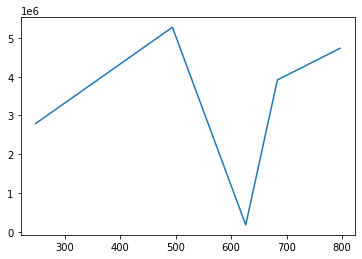

In [ ]:
plt.plot(dmass, dintensity)

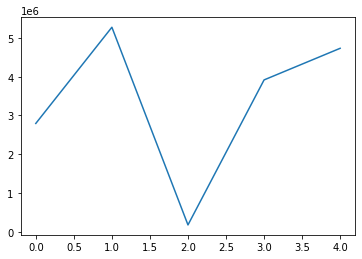

In [ ]:
plt.plot(dintensity)

In [ ]:
r

array([[1.49184825e-05],
       [1.55691224e-10],
       [9.02585214e-07],
       [6.41993514e-10],
       [1.49355852e+13],
       [6.48346044e-10],
       [8.40486016e+08],
       [2.64627913e+11],
       [1.52481884e+10],
       [3.71535475e-06],
       [1.87393974e+28],
       [3.46366464e+09],
       [7.54131967e+14],
       [1.21855823e+33],
       [8.62116337e-07],
       [7.79833856e+14],
       [3.38683576e+24],
       [2.43032859e+05],
       [2.02136972e+23],
       [5.81805079e+34],
       [8.17518250e+02],
       [1.59329203e-10],
       [1.71735209e-07],
       [4.42856770e+33],
       [1.56181662e+13],
       [2.73496181e+20],
       [1.22742195e+01],
       [3.94076640e+33],
       [3.54300013e+15],
       [2.10742328e-07],
       [4.51353008e+04],
       [6.43989365e-13],
       [1.35272415e-08],
       [3.50003132e+24],
       [2.34437938e+14],
       [4.28664627e+01],
       [4.02518833e+30],
       [1.40864906e+01],
       [2.02252264e+23],
       [1.48090732e+04],


In [ ]:
obj = _read_object_from_s3(bucket=MZML_BUCKET, key="wide/210308_MLLtx/210308_talus_03.mzML.gz")

In [ ]:
dc_obj = gzip.decompress(obj.read())

In [ ]:
mzml = pymzml.run.Reader(dc_obj.decode())

In [ ]:
with open("../data/210308_talus_03.mzML", "w") as f:
    f.write(dc_obj.decode())